In [67]:
#dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


# Collecting Data


In [2]:
# Read Data
titanic_data = pd.read_csv('train.csv')
test_model = pd.read_csv('test.csv')

In [3]:
#check data 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Length of the data
print("Length or rows in the data is: ",len(titanic_data))

Length or rows in the data is:  891


# Now Analyzing the data

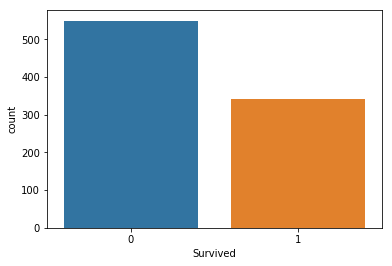

In [5]:
# Checking the survible rate 0 = not Survived ,1 = Survived
sns.countplot(x = 'Survived',data = titanic_data)

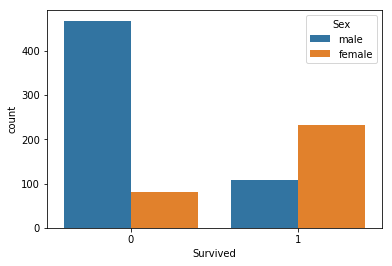

In [8]:
# Checking male female survived rate , observed that female survived rate is more than male
sns.countplot(x = 'Survived',hue = 'Sex',data = titanic_data)

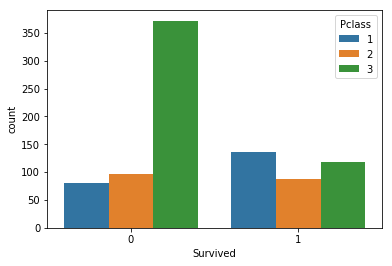

In [10]:
# Checking which class survived more observed that class 1 servived more than class 2 and 3
sns.countplot(x='Survived',hue = 'Pclass',data = titanic_data)

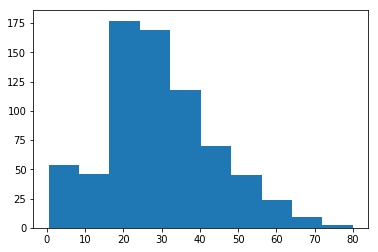

In [13]:
# passengers age ,from the graph it's observed that 20-25 age people travel more
titanic_data['Age'].hist(grid = False)

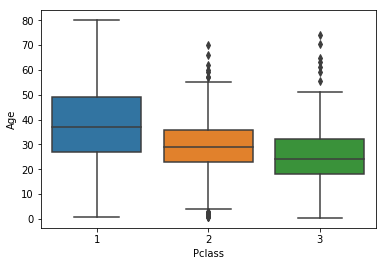

In [30]:
# let's see which age range travel in which class,from graph low age people travel in class 3 and high age class 1
sns.boxplot(x=titanic_data['Pclass'],y=titanic_data['Age'])

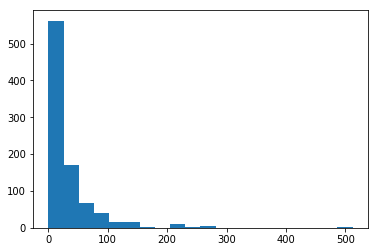

In [16]:
# Let's see the fare 
titanic_data['Fare'].hist(grid = False,bins=20)

# Now clean the data 

In [18]:
# information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
# Check for null values it's True is data is null False is data present
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [20]:
# Sum all the null values for rows ,from graph we can see the Cabin row have lots of null values so it will
# be better to drop and this Cabin column is not so important
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Drop Cabin column
titanic_data.drop('Cabin',axis = 1,inplace = True)

In [23]:
# No more Cabin column
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


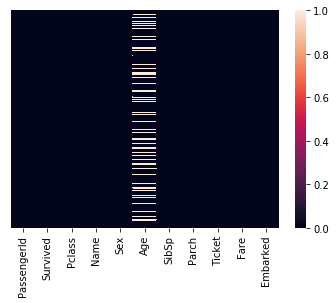

In [26]:
# Another way to visualize the null values,from graph white bars means null values
sns.heatmap(data = titanic_data.isnull(),yticklabels=False)

In [34]:
# Now fill the Age null value 
titanic_data.dropna(inplace = True)

In [35]:
len(titanic_data)

712

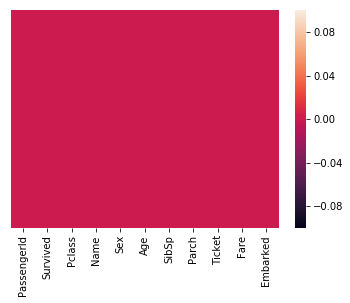

In [37]:
# Again Visualize the data ,from graph you can see no bar for null values
sns.heatmap(data = titanic_data.isnull(),yticklabels=False)

In [39]:
# You also can check that way
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
# we can't feed any string values to the model like in this data 'Sex','Name','Embraked'
# here we don't need names so we can drop it

In [42]:
# Drop name column
titanic_data.drop('Name',axis = 1,inplace=True)

In [46]:
# Convert String values to numerical
# Sex column 
sex = pd.get_dummies(titanic_data['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [48]:
# Now see a person could be male or female (Avoid exceptional cases😁)
# we can drop one column from 'Sex' table .It's like
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()
# if male then 1 ,if female then 0

,male
0,1
1,0
2,0
3,0
4,1


In [50]:
# Samething we can do with 'Embarked' and 'Pclass'
# Here there are 3 values different values in this columns ,see data
pclass = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pclass.head()
# here we can say that if passengers are not travelling into class 2 and 3 then it's obious that it's class 1 (again avoid exceptions😁)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [51]:
# from Embarked
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [52]:
# Add this column to the main data
titanic_data = pd.concat([titanic_data,sex,pclass,embark],axis = 1)

In [53]:
# In last columns you can see this columns are added
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [59]:
# Now we can drop string columns and unessary columns
titanic_data.drop(['Pclass','Sex','PassengerId','Ticket','Embarked'],axis = 1,inplace = True)

In [61]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Now Split the data and Train the model

In [62]:
# x is input data and y is labeled  
x = titanic_data.drop('Survived',axis = 1)
y = titanic_data['Survived']

In [63]:
# Just for understand
x.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,1


In [64]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [70]:
# Now we have to split our data set to train and test for that 
from sklearn.model_selection import train_test_split

In [71]:
# Split the data in train = 70%,test = 30% ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [73]:
# you can check this way for every value
x_test.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
689,15.0,0,1,211.3375,0,0,0,0,1
279,35.0,1,1,20.2500,0,0,1,0,1
508,28.0,0,0,22.5250,1,0,1,0,1
9,14.0,1,0,30.0708,0,1,0,0,0
496,54.0,1,0,78.2667,0,0,0,0,0


In [74]:
# Now import Logistic regression model
from sklearn.linear_model import LogisticRegression

In [75]:
# Create object of the class
logmodel = LogisticRegression()

In [77]:
# Train the model avoid the warning it,s ok
logmodel.fit(x_train,y_train)

C:\Users\AArup\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
# Now make Prediction
prediction = logmodel.predict(x_test)

In [81]:
# If you see prediction then uncomment below code
#print(prediction)

# Calculate Accuracy

In [85]:
# To calculate accuracy we have to import confusion_matrix.
# It's nothing but just return a 2D matrix ,from moer check ReadMe file
from sklearn.metrics import confusion_matrix,accuracy_score

In [86]:
confusion_matrix(y_test,prediction)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [97]:
accu = accuracy_score(y_test,prediction)*100
print('Model accuracy is: %.2f'%accu+'%')

Model accuracy is: 78.50%


In [96]:
# This way its calculated
ac = (105+63)/(105+21+25+63)*100
print('This way the accuracy is calculated: %.2f'%ac+'%')

This way the accuracy is calculated: 78.50%


# Our model is ready enjoy

# Now for testing we will use test_model data

In [98]:
# Steps will be same for cleaning the data


In [99]:
test_model.drop('Cabin',axis = 1,inplace = True)

In [100]:
test_model.dropna(inplace=True)

In [101]:
test_model.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

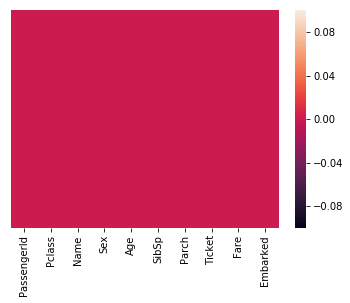

In [102]:
sns.heatmap(test_model.isnull(),yticklabels=False)

In [103]:
test_model.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [104]:
sex = pd.get_dummies(test_model['Sex'],drop_first=True)

In [105]:
pclass = pd.get_dummies(test_model['Pclass'],drop_first=True)

In [106]:
embark = pd.get_dummies(test_model['Embarked'],drop_first=True)

In [107]:
test_model = pd.concat([test_model,sex,pclass,embark],axis = 1)

In [108]:
test_model.drop(['Sex','Pclass','Embarked'],axis = 1,inplace = True)

In [110]:
test_model.drop(['PassengerId','Name','Ticket'],axis = 1,inplace=True)

In [111]:
test_model.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,34.5,0,0,7.8292,1,0,1,1,0
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [112]:
# Test the model with this data
prd = logmodel.predict(test_model)

In [115]:
# Print the predictions
print(prd)
len(prd)


[0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0]


331

# 😪 